# Keras customization

Minimal example of overloading Keras methods for model customization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kerastuner as kt

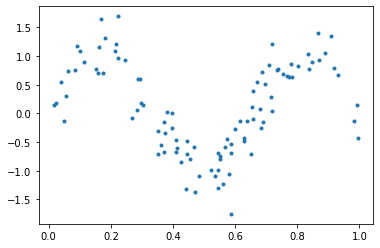

In [3]:
# Cook some simplistic data:
x = np.sort(np.random.uniform(size=100))
y = np.sin(x*3*np.pi) + np.random.normal(size=x.shape)/3
plt.plot(x,y,'.');

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), # https://www.tensorflow.org/api_docs/python/tf/keras/Input
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Custom callback(s)
# https://www.tensorflow.org/guide/keras/custom_callback

class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            print(f"{logs['loss']:0.3}", end=' ')

0.633 0.478 0.243 0.228 0.218 0.21 0.204 0.194 0.183 0.173 0.163 0.159 0.169 0.155 0.141 0.147 0.148 0.135 0.137 0.133 0.138 0.129 0.127 0.144 0.12 

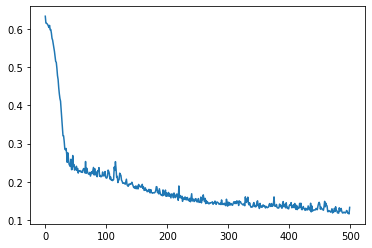

In [6]:
history = model.fit(x, y,
                    batch_size=16,
                    epochs=500,
                    verbose=0,
                    callbacks=[CustomCallbacks()]
                    #, validation_data=(x, y)
                   )

plt.plot(history.history['loss']);

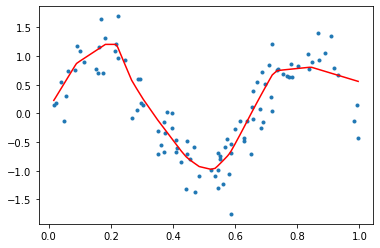

In [7]:
y_new = model.predict(x)
plt.plot(x,y, '.');
plt.plot(x, y_new, 'r-');